
## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

* **Reading the dataset.**
* **Finding the shape of dataset**

In [4]:
df = pd.read_csv('gas_emissions.csv')

In [5]:
rows=len(df.axes[0])
print("Rows:",rows)
columns = len(df.axes[1])
print("Variables:" ,columns)

Rows: 7384
Variables: 11


**Checking the missing values**

In [6]:
print(df.isnull().sum())

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


#### Finding the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [7]:
df_filtered = df.where(df['CO'] > 3)
average= df_filtered['AP'].mean()
print(average)

1015.690017349063


#### Creating a correlation map between the variables. FInding which variables have high correlation (> |0.9|)?

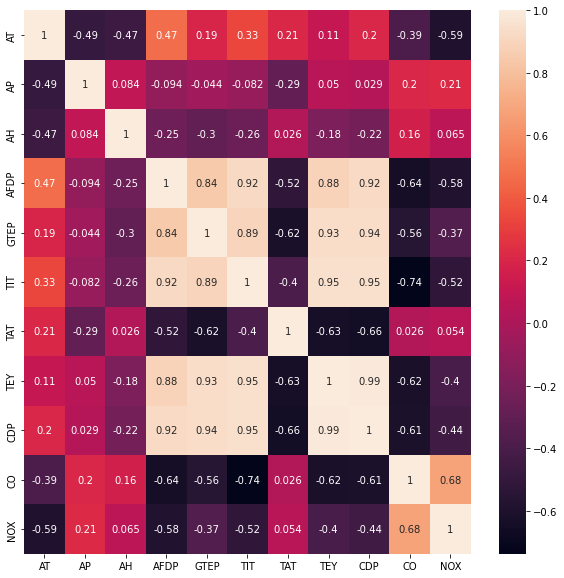

In [8]:
# Calculating the corr matrix
corr = df.corr()
fig= plt.subplots(figsize=(10,10))

# creating a heat map
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
### getting highly correlated variables
high_corr = corr[corr > 0.9].stack()
high_corr = high_corr[high_corr != 1]

# print the results
print(high_corr)

AFDP  TIT     0.915128
      CDP     0.922991
GTEP  TEY     0.932337
      CDP     0.938142
TIT   AFDP    0.915128
      TEY     0.951813
      CDP     0.951590
TEY   GTEP    0.932337
      TIT     0.951813
      CDP     0.991207
CDP   AFDP    0.922991
      GTEP    0.938142
      TIT     0.951590
      TEY     0.991207
dtype: float64


#### Creating a scatter plot of 'TEY' vs 'CDP'

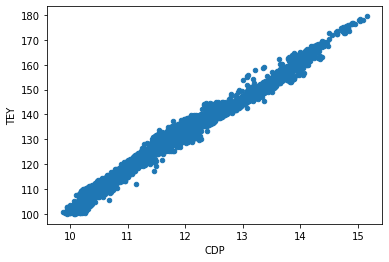

In [10]:
df.plot.scatter(x='CDP', y='TEY')
plt.show()

#### Creating histograms for CO and NOX.

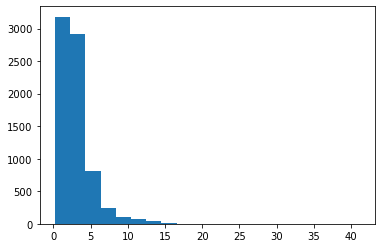

In [11]:
plt.hist(df['CO'], bins=20)
plt.show()

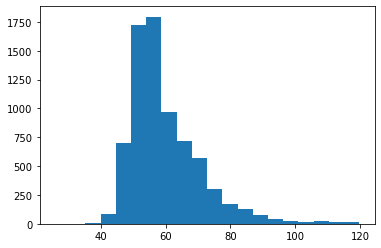

In [12]:
plt.hist(df['NOX'], bins=20)  
plt.show()

#### Creating a sctter plot of CO vs NOX.

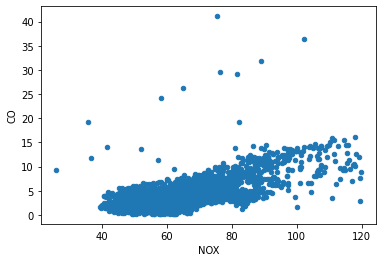

In [13]:
df.plot.scatter(x='NOX', y='CO')
plt.show()

- Predicting CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.

In [14]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

### Train test split and applying Standardization.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [16]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [17]:
X_train.shape

(5316, 9)

In [18]:
X_val.shape

(1329, 9)

In [19]:
X_test.shape

(739, 9)

In [20]:
tb_reg = []
tb_class = []



## Linear Regression

- Applying Linear Regression. Predicting CO emission using other variables.
    - Finding $R^2$ on training data?
    - Finding $R^2$ on validation data?
    - Finding Root Mean Squared Error (RMSE) on training data?
    - Finding RMSE on validation data?

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### declaring the model
model = LinearRegression()

# training the model on training data
model.fit(X_train, y_train)

## predicting on validation and training dataset
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model on training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred,)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
import numpy as np

# Calculate RMSE from MSE
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)

### calculating R^2 score
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test,y_test_pred)

### printing r^2 and rmse values
print("Linear regression model")
print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Testing R-Squared:", test_r2)
print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:" , test_rmse)
tb_reg.append([model, train_r2, val_r2, train_rmse, val_rmse])

Linear regression model
Training R-squared: 0.6640090820784397
Validation R-squared: 0.646343190818214
Testing R-Squared: 0.4933553548660514
Training RMSE: 1.2720122104103535
Validation RMSE: 1.3884894690085987
Testing RMSE: 1.6611828303619118


## Random Forest Regression

- Applying Random Forest Regression with 100 trees.
    - Finding $R^2$?
    - Finding $R^2$ on validation data?
    - Finding RMSE on training data?
    - Finding RMSE on validation data?

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# initiating the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on training data
rf_model.fit(X_train, y_train)

# predicting on training and validation data
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Calculating r^2 score
train_r2_rf = r2_score(y_train, y_train_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)
test_r2_rf = r2_score(y_test,y_test_pred_rf)

# Calculate RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

### printing r^2 score and rmse values
print("Random Forest Regression Model")
print("Training R-squared:", train_r2_rf)
print("Validation R-squared:", val_r2_rf)
print("testing R-squared:",test_r2_rf)
print("Training RMSE:", train_rmse_rf)
print("Validation RMSE:", val_rmse_rf)
print("testing RMSE:",test_rmse_rf)
tb_reg.append([rf_model, train_r2_rf, val_r2_rf, train_rmse_rf, val_rmse_rf])

Random Forest Regression Model
Training R-squared: 0.9668394285359844
Validation R-squared: 0.7554950368016639
testing R-squared: 0.5346575148158078
Training RMSE: 0.3996119935682945
Validation RMSE: 1.1545039355534052
testing RMSE: 1.5920329709127723


Checking whether the training and validation score close? If not what might be the problem?
Ans) the difference of r^2 score between training and validation is 0.2114.Its more.The hyperparameters of the model may not be properly tuned. For example, the number of trees in a Random Forest model or the depth of the trees may not be optimal, leading to suboptimal performance on the validation set.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model_tuned = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5,min_samples_leaf=4,random_state=42)

rf_model_tuned.fit(X_train, y_train)
    
# Re-evaluate performance
y_train_pred_tuned = rf_model_tuned.predict(X_train)
y_val_pred_tuned = rf_model_tuned.predict(X_val)

## calculating r^2 score
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)
rmse_train_tuned = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))

## calculating rmse value
r2_val_tuned = r2_score(y_val, y_val_pred_tuned)
rmse_val_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
### printing r^2 score and rmse values
print("Random Forest Regression tuned Model")
print("Training R-squared:", r2_train_tuned)
print("Validation R-squared:", r2_val_tuned)
print("Training RMSE:", rmse_train_tuned)
print("Validation RMSE:",rmse_val_tuned)
tb_reg.append([rf_model_tuned, r2_train_tuned, r2_val_tuned, rmse_train_tuned, rmse_val_tuned])

Random Forest Regression tuned Model
Training R-squared: 0.8751454201671467
Validation R-squared: 0.7564798310353222
Training RMSE: 0.7754070581591831
Validation RMSE: 1.1521765882084867


## Support Vector Regressor

- Applying Support Vector Regression. Predicting CO emission using other variables.
    - Finding $R^2$?
    - Finding $R^2$ on validation data?
    - Finding RMSE on training data?
    - Finding RMSE on validation data?
    
- Implementing the below Kernels with default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [26]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [27]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [28]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Train the model on the training data
estimator.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = estimator.predict(X_val)

# Evaluate the model on the validation data
val_mse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Make predictions on the testing data
y_test_pred = estimator.predict(X_test)

# Evaluate the model on the testing data
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))

##calculating r^2 score values

train_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

### printing r^2 score and rmse values
print("Linear SVM Regressor Model")
print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Training RMSE:", test_mse)
print("Validation RMSE:",val_mse)
tb_reg.append([estimator, train_r2, val_r2, test_mse, val_mse])

Linear SVM Regressor Model
Training R-squared: 0.4779448239593125
Validation R-squared: 0.6021447054947482
Training RMSE: 1.6862575542840845
Validation RMSE: 1.472699532649528


### Polynomial Kernel SVM Regressor

In [29]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [30]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Train the model on the training data
estimator.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = estimator.predict(X_val)

# Evaluate the model on the validation data
val_mse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Make predictions on the testing data
y_test_pred = estimator.predict(X_test)

# Evaluate the model on the testing data
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))

##calculating r^2 score values

train_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

### printing r^2 score and rmse values
print("Poly Kernel SVM Regressor Model")
print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Training RMSE:", test_mse)
print("Validation RMSE:",val_mse)
tb_reg.append([estimator, train_r2, val_r2, test_mse, val_mse])

Poly Kernel SVM Regressor Model
Training R-squared: 0.5105320772237205
Validation R-squared: 0.7310487212257795
Training RMSE: 1.6327805678400242
Validation RMSE: 1.21084453183651


### RBF Kernel SVM Regressor

In [31]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

In [32]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Train the model on the training data
estimator.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = estimator.predict(X_val)

# Evaluate the model on the validation data
val_mse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Make predictions on the testing data
y_test_pred = estimator.predict(X_test)

# Evaluate the model on the testing data
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))

##calculating r^2 score values

train_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

### printing r^2 score and rmse values
print("RBF Kernel SVM Regressor Model")
print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Training RMSE:", test_mse)
print("Validation RMSE:",val_mse)
tb_reg.append([estimator, train_r2, val_r2, test_mse, val_mse])

RBF Kernel SVM Regressor Model
Training R-squared: 0.5933703930098784
Validation R-squared: 0.7476173201040637
Training RMSE: 1.4882133759945966
Validation RMSE: 1.1729550025939746


### Q5 [10]

- Considering RBF Kernel SVM and perform hyperparameter tuning to increase the $R^2$ score.   
    - Using:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - Finding $R^2$?
    - Finding $R^2$ on validation data?
    - Finidng RMSE on training data?
    - Finding RMSE on validation data?

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# Define the parameter grid
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

# Instantiate the SVR model with RBF kernel
estimator = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_estimator = grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_val_pred = best_estimator.predict(X_val)

# Calculate R^2 score on validation data
val_r2 = r2_score(y_val, y_val_pred)
print("Validation R-squared:", val_r2)

# Make predictions on the training data using the best model
y_train_pred = best_estimator.predict(X_train)

# Calculate R^2 score on training data
train_r2 = r2_score(y_train, y_train_pred)
print("Training R-squared:", train_r2)

# Calculate RMSE on training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)

# Calculate RMSE on validation data
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE:", val_rmse)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
tb_reg.append([best_estimator, train_r2, val_r2, train_rmse, val_rmse])

Validation R-squared: 0.7568500533368374
Training R-squared: 0.7922405098708516
Training RMSE: 1.000248586951225
Validation RMSE: 1.151300431383078
Best hyperparameters: {'C': 1000, 'gamma': 0.01}


## PCA

- Applying PCA and transform the data.


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

* For PCA we need to decide on the number of  components. Considering the components that can explain 90% of variance.*

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


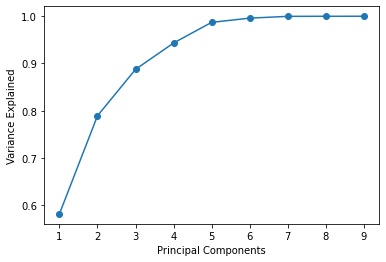

In [37]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [38]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [39]:
from sklearn.decomposition import PCA

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predictions on training and validation data
y_train_pred = model.predict(X_train_pca)
y_val_pred = model.predict(X_val_pca)

# Calculate R-squared (𝑅2) scores
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
tb_reg.append([model, train_r2, val_r2, train_rmse, val_rmse])

Training R-squared: 0.6640090820784397
Validation R-squared: 0.646343190818214
Training RMSE: 1.2720122104103535
Validation RMSE: 1.3884894690085987


**RF Regression with PCA transformed data**

In [40]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_pca, y_train)

# Predictions on training and validation data
y_train_pred = rf_regressor.predict(X_train_pca)
y_val_pred = rf_regressor.predict(X_val_pca)

# Calculate R-squared (𝑅2) scores
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
tb_reg.append([rf_regressor, train_r2, val_r2, train_rmse, val_rmse])

Training R-squared: 0.9666076590329434
Validation R-squared: 0.7406732023404294
Training RMSE: 0.40100606789243837
Validation RMSE: 1.188981991088001


**SVM Regression with PCA transformed data**

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


# Create and train SVR  model
svm_regressor = SVR(kernel='rbf') 
svm_regressor.fit(X_train_pca, y_train)

# Predictions on training and validation data
y_train_pred = svm_regressor.predict(X_train_pca)
y_val_pred = svm_regressor.predict(X_val_pca)

# Calculate R-squared (𝑅2) scores
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

print("Training R-squared:", train_r2) 
print("Validation R-squared:", val_r2) 
print("Training RMSE:", train_rmse) 
print("Validation RMSE:", val_rmse) 
tb_reg.append([svm_regressor, train_r2, val_r2, train_rmse, val_rmse]) 

Training R-squared: 0.7653225070588423
Validation R-squared: 0.7476173201040639
Training RMSE: 1.0630733502205554
Validation RMSE: 1.1729550025939743


## Classification

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [42]:
from sklearn.preprocessing import Binarizer

In [43]:
binarizer = Binarizer(threshold=3)

In [44]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [45]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

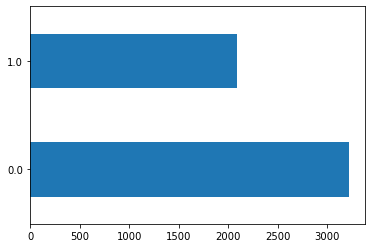

In [46]:
y_train_cat.value_counts().plot.barh()

## SVM classifier(RBF Kernel)

In [47]:
from sklearn.svm import SVC

In [48]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 (Considering  Standardized training dataset)

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, balanced_accuracy_score, f1_score

# Create SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Define parameter
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_cat)

# Get best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Train SVM classifier with best hyperparameters on the entire training data
best_svm_classifier = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm_classifier.fit(X_train, y_train_cat)

# Predictions on validation data
y_val_pred = best_svm_classifier.predict(X_val)

# Evaluation metrics
conf_matrix = confusion_matrix(y_val_cat, y_val_pred)
recall = recall_score(y_val_cat, y_val_pred)
precision = precision_score(y_val_cat, y_val_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
balanced_accuracy = balanced_accuracy_score(y_val_cat, y_val_pred)
f1 = f1_score(y_val_cat, y_val_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)
tb_class.append([best_svm_classifier, f1 ])

Confusion Matrix:
[[762  50]
 [ 68 449]]
Recall (Sensitivity): 0.8684719535783365
Specificity: 0.9384236453201971
Precision: 0.8997995991983968
Balanced Accuracy: 0.9034477994492668
F1 Score: 0.8838582677165354


#### SVC Model 2 (Consdiering PCA transformed dataset)

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score

# Create SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Define the hyperparameters for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca2, y_train_cat)  # Assuming X_train_pca2 and y_train are defined

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Train the best model on the entire training data with the best hyperparameters
best_svm_classifier = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm_classifier.fit(X_train_pca2, y_train_cat)

# Evaluate the best model on the validation set
y_val_pred = best_svm_classifier.predict(X_val_pca2)  # Assuming X_val_pca2 is defined

# Confusion matrix
conf_matrix = confusion_matrix(y_val_cat, y_val_pred)

# Calculate Recall (Sensitivity)
recall = recall_score(y_val_cat, y_val_pred)

# Calculate Specificity
specificity = recall_score(y_val_cat, y_val_pred, pos_label=0)  # Assuming the negative class is labeled as 0

# Calculate Precision
precision = precision_score(y_val_cat, y_val_pred)

# Calculate Balanced Accuracy
balanced_accuracy = accuracy_score(y_val_cat, y_val_pred)

# Calculate F1 Score
f1 = f1_score(y_val_cat, y_val_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)
tb_class.append([best_svm_classifier, f1 ])

Confusion Matrix:
[[767  45]
 [ 71 446]]
Recall (Sensitivity): 0.8626692456479691
Specificity: 0.9445812807881774
Precision: 0.9083503054989817
Balanced Accuracy: 0.9127163280662152
F1 Score: 0.884920634920635


#### Implementing Feature engineering(Polynomial Features), Ensemble method: Gradient Boosting Regression to improving the regression performance.

In [51]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Feature engineering: Polynomial Features
poly_regressor = make_pipeline(PolynomialFeatures(degree=2), SVR(kernel='rbf'))
poly_regressor.fit(X_train, y_train)
y_val_pred_poly = poly_regressor.predict(X_val)
mse_poly = np.sqrt(mean_squared_error(y_val, y_val_pred_poly))
print("Polynomial Features Regression RMSE:", mse_poly)
train_r2 = r2_score(y_val,y_val_pred_poly)
print("R^2 score:",train_r2)

# Ensemble method: Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)
y_val_pred_gb = gb_regressor.predict(X_val)
mse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
print("Gradient Boosting Regression RMSE:", mse_gb)
train_r2 = r2_score(y_val, y_val_pred_gb)
print("R2 score:",train_r2)

Polynomial Features Regression RMSE: 1.193530776029953
R^2 score: 0.738685151506004
Gradient Boosting Regression RMSE: 1.1762699864954462
R2 score: 0.746188745651152


* From the r2 score value we can say that the regression performance is not increasing*

#### Implementing random sampling with different classifiers  to improving the accuracy.

* Random Forest classifier(with random sampling)*

In [52]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_val, y_val are already defined

# Resample the training data to balance classes
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_cat)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=121)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

rf_grid = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train_resampled, y_train_resampled)

best_rf = rf_grid.best_estimator_

# Evaluate performance on validation set
y_pred_rf = best_rf.predict(X_val)
accuracy_rf = accuracy_score(y_val_cat, y_pred_rf)
f1 = f1_score(y_val_cat, y_pred_rf)
print("Random Forest Classifier Accuracy on validation set with resampling:", accuracy_rf)
print("f1 score for Rf Classifier:",f1)

Random Forest Classifier Accuracy on validation set with resampling: 0.9119638826185101
f1 score for Rf Classifier: 0.8854064642507347


* Gradient Boosting Classifier(With random sampling)*

In [53]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Resample the training data to balance classes
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_cat)

# GBM Classifier
gbm_classifier = GradientBoostingClassifier()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'learning_rate': [0.1]
}

gbm_grid = GridSearchCV(gbm_classifier, param_grid, cv=5, scoring='accuracy')
gbm_grid.fit(X_train_resampled, y_train_resampled)

best_gbm = gbm_grid.best_estimator_

# Evaluate performance on validation set
y_pred_gbm = best_gbm.predict(X_val)
accuracy_gbm = accuracy_score(y_val_cat, y_pred_gbm)
f1 = f1_score(y_val_cat, y_pred_gbm)
print("Gradient Boosting Machine Classifier Accuracy on validation set with resampling:", accuracy_gbm)
print("f1 score for GBM Classifier:",f1)

Gradient Boosting Machine Classifier Accuracy on validation set with resampling: 0.909706546275395
f1 score for GBM Classifier: 0.8821218074656189


* From F1 score value we can say that performance is not increasing*

## Top 2 Best Regressors

In [54]:
df = pd.DataFrame(tb_reg, columns =['Model Name', 'r2 Train', 'r2 validation', 'RMSE train', 'RMSE validaiton'])
sort = df.sort_values("r2 Train", ascending=False) 
display(sort.iloc[:3])

,Model Name,r2 Train,r2 validation,RMSE train,RMSE validaiton
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.966839,0.755495,0.399612,1.154504
8,"(DecisionTreeRegressor(max_features='auto', ra...",0.966608,0.740673,0.401006,1.188982
2,"(DecisionTreeRegressor(max_depth=20, max_featu...",0.875145,0.756480,0.775407,1.152177


## Top 2 Best Classifiers

In [55]:
df = pd.DataFrame(tb_class, columns =['Model Name',  'Score'])
sort = df.sort_values("Score", ascending=False) 
display(sort.iloc[:3])

,Model Name,Score
1,"SVC(C=100, gamma=0.1)",0.884921
0,"SVC(C=1, gamma=1)",0.883858
